## <a id="home">Table of Contents</a>
4.1 [Probability Distributions](#4-1)     
4.2 [Binomial Distribution](#4-2)

Go to [The End](#the-end)

## <a id="4-1">4.1 Probability Distributions</a> (Back to [Home](#home))

#### Example 2

We will show how to generate frequency distribution of Example 2 and plot the histogram of the distribution.

Firstly, we import all the libraries.

In [50]:
from collections import defaultdict
import matplotlib.pyplot as plt
from numpy import random
import numpy as np

In [49]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We construct the dataset of scores.

In [8]:
dataset_score = [1] * 24
score_2 = [2] * 33
score_3 = [3] * 42
score_4 = [4] * 30
score_5 = [5] * 21
dataset_score.extend(score_2)
dataset_score.extend(score_3)
dataset_score.extend(score_4)
dataset_score.extend(score_5)


We count the total number of scores.

In [17]:
total_data = len(dataset_score)

We construct the **distribution frequency**.

In [85]:
def construct_dist_freq(dataset_score):
    dist_freq = defaultdict(int)
    for score in dataset_score:
        dist_freq[score] += 1    
    return dist_freq



We construct the **probability distribution**.

In [88]:
def construct_prob_dist(dist_freq):
    prob_dist = defaultdict(float)
    total_data = sum(dist_freq.values())
    for score in dist_freq.keys():
        prob_dist[score] = float(dist_freq[score]) / total_data  
    return prob_dist

Let's create the distribution frequency of our dataset.

In [86]:
dist_freq = construct_dist_freq(dataset_score)
dist_freq

defaultdict(int, {1: 24, 2: 33, 3: 42, 4: 30, 5: 21})

Let's create the probability distribution from our distribution frequency.

In [87]:
prob_dist = construct_prob_dist(dist_freq)
prob_dist

defaultdict(float, {1: 0.16, 2: 0.22, 3: 0.28, 4: 0.2, 5: 0.14})

In [90]:
prob_dist

defaultdict(float, {1: 0.16, 2: 0.22, 3: 0.28, 4: 0.2, 5: 0.14})

We construct a method to generate one score based on the distribution frequency.

In [91]:
def generate_data(dataset_score):
    '''
    '''
    num_data = len(dataset_score)
    indeks_acak = random.randint(num_data)
    score_acak = dataset_score[indeks_acak]
    return score_acak

In [105]:
generate_data(dataset_score)

2

Let's generate 100 scores. 

In [92]:
one_hundred_random_scores = []

In [93]:
for count in range(100):
    one_hundred_random_scores.append(generate_data(dataset_score))

Let us compute the probability distribution for our 100 random scores.

In [97]:
construct_prob_dist(construct_dist_freq(one_hundred_random_scores))

defaultdict(float, {5: 0.14, 1: 0.21, 3: 0.36, 4: 0.19, 2: 0.1})

Let us plot the histogram.

Text(0, 0.5, 'Probability')

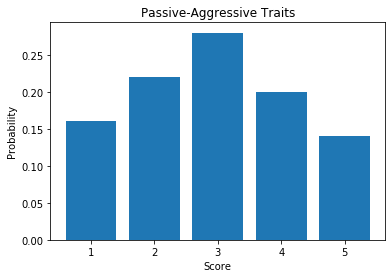

In [55]:
names = ['1', '2', '3', '4', '5']
values = list(dist_freq.values())
plt.bar(names,values)
plt.title("Passive-Aggressive Traits")
plt.xlabel("Score")
plt.ylabel("Probability")

## <a id="4-2">4.2 Binomial Distribution</a> (Back to [Home](#home))

You can find our reference in [here](https://towardsdatascience.com/fun-with-the-binomial-distribution-96a5ecabf65b) 

In [106]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns# Input variables# Number of trials
trials = 1000# Number of independent experiments in each trial
n = 10 # Probability of success for each experiment
p = 0.5# Function that runs our coin toss trials
# heads is a list of the number of successes from each trial of n experiments
def run_binom(trials, n, p):
    heads = []
    for i in range(trials):
        tosses = [np.random.random() for i in range(n)]
        heads.append(len([i for i in tosses if i>=0.50]))
    return heads

In [117]:
# Run the function
heads = run_binom(trials, n, p)

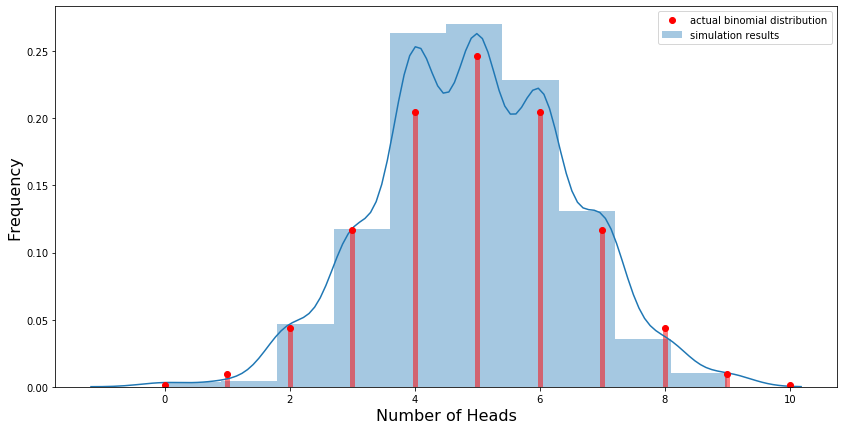

In [121]:
# Plot the results as a histogram
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.distplot(heads, bins=10, label='simulation results')
ax.set_xlabel("Number of Heads",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)

# Plot the actual binomial distribution as a sanity check
from scipy.stats import binom
x = range(0,11)
ax.plot(x, binom.pmf(x, n, p), 'ro', label='actual binomial distribution')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='r', lw=5, alpha=0.5)
plt.legend()
plt.show()

In [129]:
binom.pmf(1, 3, .5)

0.375

## <a id=the-end>The End</a> (Back to [Home](#home))